In [2]:
from astroquery.sdss import SDSS
from matplotlib import pyplot as plt
import numpy as np

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
query = "SELECT   s.z,s.zErr,p.petroMag_g,p.petroMagErr_g   FROM PhotoObjAll p   JOIN SpecObjAll s   ON s.bestObjID = p.objID WHERE  s.z between 0.3 and 0.4  AND s.zWarning = 0"

In [4]:
rdata = SDSS.query_sql(query)
rdata

z,zErr,petroMag_g,petroMagErr_g
float64,float64,float64,float64
0.3097279,4.31044e-05,20.72285,0.05893046
0.3089286,6.985982e-05,20.37166,0.124343
0.3184498,4.838185e-05,20.32796,0.08169658
0.3746423,5.868603e-05,20.15127,0.02769253
0.3643312,8.911065e-05,20.66557,0.1291454
0.325152,8.501906e-05,19.94118,0.09071449
0.3869393,0.0001034989,21.26645,0.4227642
0.3900169,9.724175e-05,21.1629,0.2280796
0.3500149,6.223712e-05,20.88694,0.2834965


In [5]:
# data.sort('z')
mdata = rdata[(rdata['petroMag_g'] > 15) & (rdata['petroMag_g'] < 27) & (rdata['zErr'] > 0) & (rdata['zErr'] < 0.001) & (rdata['petroMagErr_g'] < 2 ) ]  
mdata

z,zErr,petroMag_g,petroMagErr_g
float64,float64,float64,float64
0.3097279,4.31044e-05,20.72285,0.05893046
0.3089286,6.985982e-05,20.37166,0.124343
0.3184498,4.838185e-05,20.32796,0.08169658
0.3746423,5.868603e-05,20.15127,0.02769253
0.3643312,8.911065e-05,20.66557,0.1291454
0.325152,8.501906e-05,19.94118,0.09071449
0.3869393,0.0001034989,21.26645,0.4227642
0.3900169,9.724175e-05,21.1629,0.2280796
0.3500149,6.223712e-05,20.88694,0.2834965


In [6]:
reds = mdata['z']
redsErr = mdata['zErr']
petro = mdata['petroMag_g']
petroErr = mdata['petroMagErr_g']

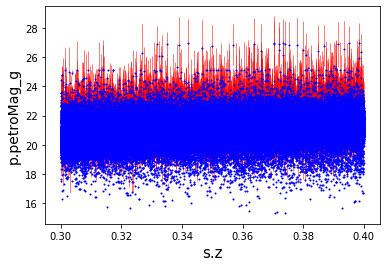

In [19]:
plt.plot(reds,petro,'o',markersize=1,color = 'blue')
plt.errorbar(reds,petro,xerr=redsErr,yerr=petroErr,fmt= ' ',color = 'red',elinewidth=0.5,barsabove= True)
plt.xlabel("s.z",fontsize=15)
plt.ylabel("p.petroMag_g",fontsize=14)

plt.show()